# **LOAN ELIGIBILITY PREDICTOR**

# Introduction

This project aims to predict whether an applicant is eligible for provision of a loan or not with the help of Binary Classification based on various factors such as marital status, dependents, gender, income, previous lian amount, credit history and so on.

# Importing the required Libraries and Reading the data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train=pd.read_csv("train.csv")
test=pd.read_csv("Test.csv")

In [ ]:
train_orig=train.copy()
test_orig=test.copy()

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


# Data Exploration: Univariate Analysis

In [ ]:
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
train["Loan_Status"].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [ ]:
train["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
train["Gender"].value_counts(normalize=True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

In [ ]:
train["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [ ]:
train["Married"].value_counts(normalize=True)

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

In [ ]:
train["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
train["Self_Employed"].value_counts(normalize=True)

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

In [ ]:
train["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
train["Credit_History"].value_counts(normalize=True)

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

In [ ]:
train["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
train["Dependents"].value_counts(normalize=True)

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

In [ ]:
train["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [ ]:
train["Education"].value_counts(normalize=True)

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

In [ ]:
train["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [ ]:
train["Property_Area"].value_counts(normalize=True)

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64

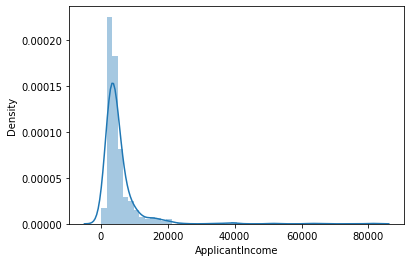

In [ ]:
sns.distplot(train["ApplicantIncome"])

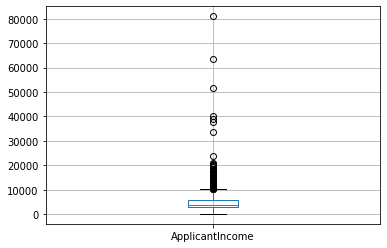

In [ ]:
train.boxplot('ApplicantIncome')
plt.show()

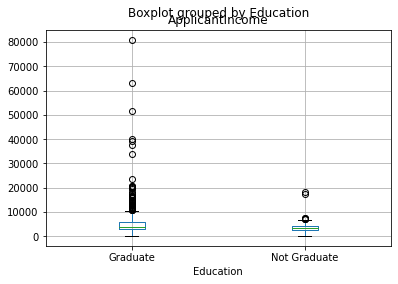

In [ ]:
train.boxplot('ApplicantIncome',by='Education')
plt.show()

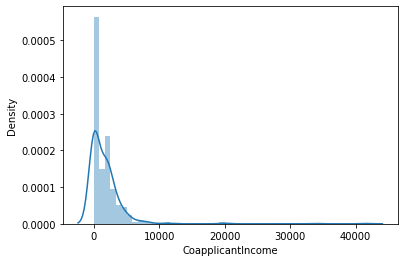

In [ ]:
sns.distplot(train["CoapplicantIncome"])

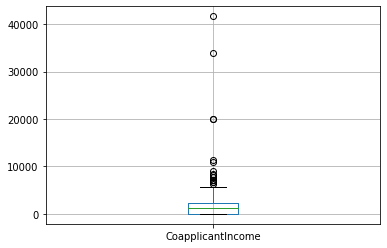

In [ ]:
train.boxplot('CoapplicantIncome')
plt.show()

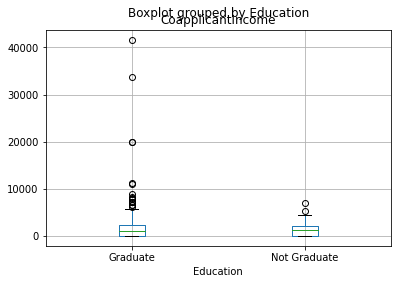

In [ ]:
train.boxplot('CoapplicantIncome',by='Education')
plt.show()

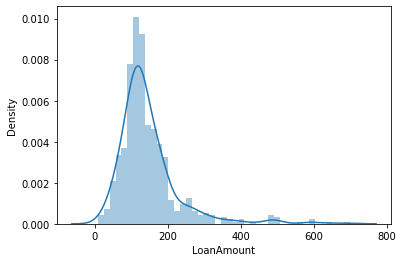

In [ ]:
sns.distplot(train["LoanAmount"])

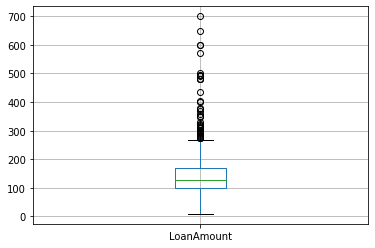

In [ ]:
train.boxplot('LoanAmount')
plt.show()

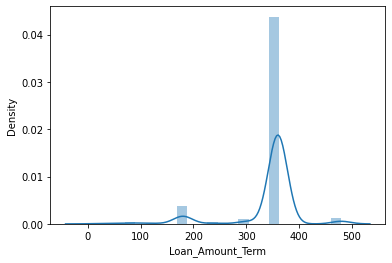

In [ ]:
sns.distplot(train["Loan_Amount_Term"])

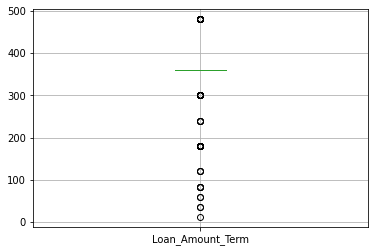

In [ ]:
train.boxplot('Loan_Amount_Term')
plt.show()

# Data Exploration: Bivariate Analysis

In [ ]:
print(pd.crosstab(train["Gender"],train["Loan_Status"]))

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


In [ ]:
print(pd.crosstab(train["Married"],train["Loan_Status"]))

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


In [ ]:
print(pd.crosstab(train["Dependents"],train["Loan_Status"]))

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


In [ ]:
print(pd.crosstab(train["Education"],train["Loan_Status"]))

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


In [ ]:
print(pd.crosstab(train["Self_Employed"],train["Loan_Status"]))

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


In [ ]:
print(pd.crosstab(train["Credit_History"],train["Loan_Status"]))

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


In [ ]:
print(pd.crosstab(train["Property_Area"],train["Loan_Status"]))

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


In [ ]:
df=train.dropna()

In [ ]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

In [ ]:
print(pd.crosstab(train["Income_bin"],train["Loan_Status"]))

Loan_Status   N    Y
Income_bin          
Low          26   57
Average      51  123
High         32   79
Very high    39   73


In [ ]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['CoIncome_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)

In [ ]:
print(pd.crosstab(train["CoIncome_bin"],train["Loan_Status"]))

Loan_Status    N    Y
CoIncome_bin         
Low            3   15
Average       46  123
High          24   53


In [ ]:
train['TotApplicantIncome']=train['ApplicantIncome']+train['CoapplicantIncome']

In [ ]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['TotIncome_bin']=pd.cut(train['TotApplicantIncome'],bins,labels=group)

In [ ]:
print(pd.crosstab(train["TotIncome_bin"],train["Loan_Status"]))

Loan_Status     N    Y
TotIncome_bin         
Low            14   10
Average        32   87
High           65  159
Very high      81  166


In [ ]:
bins=[0,100,200,700]
group=['Low','Average','High']
train["LoanAmount_bin"]=pd.cut(df["LoanAmount"],bins,labels=group)

In [ ]:
print(pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"]))

Loan_Status      N    Y
LoanAmount_bin         
Low             38   86
Average         83  207
High            27   39


# Dropping Columns

In [ ]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,CoIncome_bin,TotApplicantIncome,TotIncome_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,NaN,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,High,Average,6091.0,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,Average,NaN,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,Average,Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,High,NaN,6000.0,High,Average


In [ ]:
train=train.drop(["Income_bin","CoIncome_bin","LoanAmount_bin","TotApplicantIncome","TotIncome_bin"],axis=1)

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [ ]:
corr_mat=train.corr()
print(corr_mat)

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Credit_History           -0.014715          -0.002056   -0.008433   
Loan_Status              -0.004710          -0.059187   -0.037318   

                   Loan_Amount_Term  Credit_History  Loan_Status  
ApplicantIncome           -0.045306       -0.014715    -0.004710  
CoapplicantIncome         -0.059878       -0.002056    -0.059187  
LoanAmount                 0.039447       -0.008433    -0.037318  
Loan_Amount_Term           1.000000        0.001470    -0.021268  
Credit_History             0.001470        1.000000     0.561678  
Loan_Status               -0.021268        0.561678     1.000000  


# Missing Values and Outlier Treatment

In [ ]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train=train.dropna()
test=test.dropna()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 52.5+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            289 non-null    object 
 1   Gender             289 non-null    object 
 2   Married            289 non-null    object 
 3   Dependents         289 non-null    object 
 4   Education          289 non-null    object 
 5   Self_Employed      289 non-null    object 
 6   ApplicantIncome    289 non-null    int64  
 7   CoapplicantIncome  289 non-null    int64  
 8   LoanAmount         289 non-null    float64
 9   Loan_Amount_Term   289 non-null    float64
 10  Credit_History     289 non-null    float64
 11  Property_Area      289 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 29.4+ KB


# Outlier Treatment

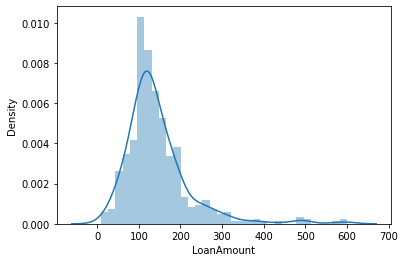

In [ ]:
sns.distplot(train["LoanAmount"])

In [ ]:
train['LoanAmount_log']=np.log(train['LoanAmount'])

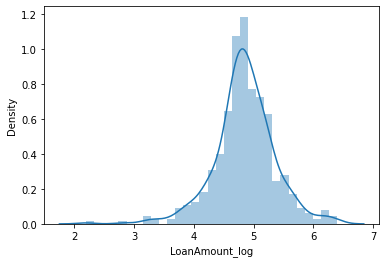

In [ ]:
sns.distplot(train["LoanAmount_log"])

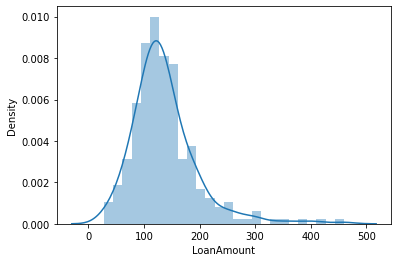

In [ ]:
sns.distplot(test["LoanAmount"])

In [ ]:
test['LoanAmount_log']=np.log(test['LoanAmount'])

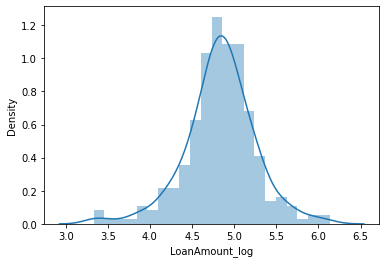

In [ ]:
sns.distplot(test["LoanAmount_log"])

In [ ]:
train['TotIncome']=train['ApplicantIncome']+train['CoapplicantIncome']

In [ ]:
test['TotIncome']=test['ApplicantIncome']+test['CoapplicantIncome']

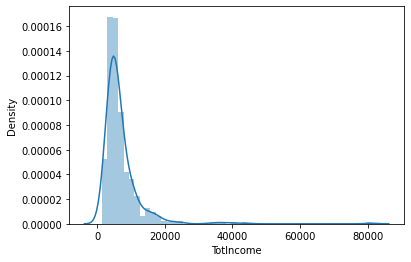

In [ ]:
sns.distplot(train['TotIncome'])

In [ ]:
train['TotIncome_log']=np.log(train['TotIncome'])

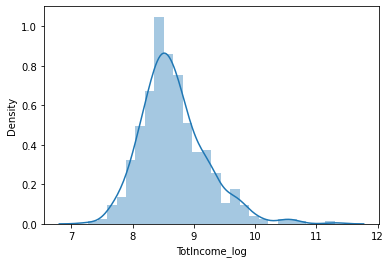

In [ ]:
sns.distplot(train['TotIncome_log'])

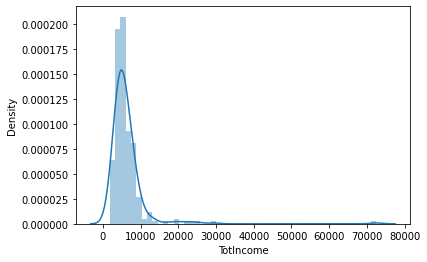

In [ ]:
sns.distplot(test['TotIncome'])

In [ ]:
test['TotIncome_log']=np.log(test['TotIncome'])

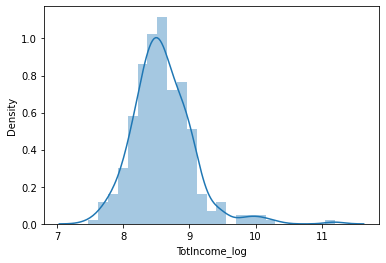

In [ ]:
sns.distplot(test['TotIncome_log'])

In [ ]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

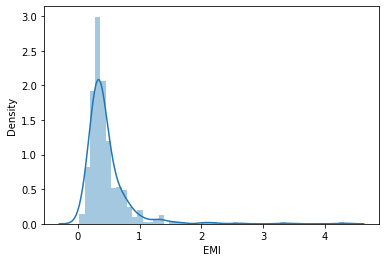

In [ ]:
sns.distplot(train['EMI'])

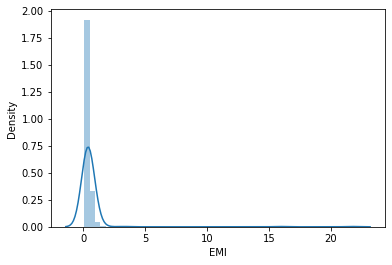

In [ ]:
sns.distplot(test['EMI'])

In [ ]:
train["BalanceIncome"]=train["TotIncome"]-train["EMI"]*1000
test["BalanceIncome"]=test["TotIncome"]-test["EMI"]

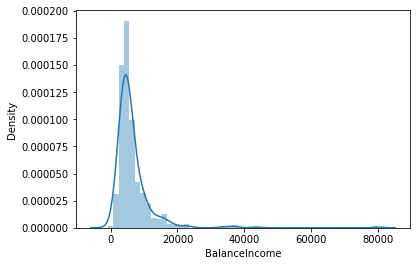

In [ ]:
sns.distplot(train['BalanceIncome'])

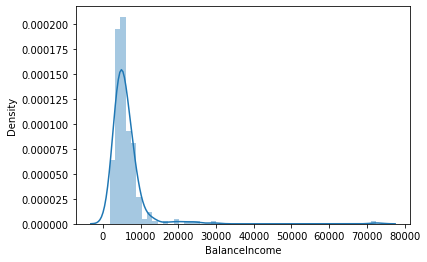

In [ ]:
sns.distplot(test['BalanceIncome'])

In [ ]:
train=train.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [ ]:
test=test.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotIncome,TotIncome_log,EMI,BalanceIncome
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,0,4.852030,6091.0,8.714568,0.355556,5735.444444
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,1,4.189655,3000.0,8.006368,0.183333,2816.666667
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,1,4.787492,4941.0,8.505323,0.333333,4607.666667
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,1,4.948760,6000.0,8.699515,0.391667,5608.333333
5,LP001011,Male,Yes,2,Graduate,Yes,1.0,Urban,1,5.587249,9613.0,9.170872,0.741667,8871.333333


In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotIncome,TotIncome_log,EMI,BalanceIncome
0,LP001015,Male,Yes,0,Graduate,No,1.0,Urban,4.700480,5720,8.651724,0.305556,5719.694444
1,LP001022,Male,Yes,1,Graduate,No,1.0,Urban,4.836282,4576,8.428581,0.350000,4575.650000
2,LP001031,Male,Yes,2,Graduate,No,1.0,Urban,5.337538,6800,8.824678,0.577778,6799.422222
4,LP001051,Male,No,0,Not Graduate,No,1.0,Urban,4.356709,3276,8.094378,0.216667,3275.783333
5,LP001054,Male,Yes,0,Not Graduate,Yes,1.0,Urban,5.023881,5587,8.628198,0.422222,5586.577778


# Model Fitting

In [ ]:
train=train.drop('Loan_ID',axis=1)

In [ ]:
test=test.drop('Loan_ID',axis=1)

In [ ]:
x=train.drop('Loan_Status',axis=1)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotIncome,TotIncome_log,EMI,BalanceIncome
1,Male,Yes,1,Graduate,No,1.0,Rural,4.852030,6091.0,8.714568,0.355556,5735.444444
2,Male,Yes,0,Graduate,Yes,1.0,Urban,4.189655,3000.0,8.006368,0.183333,2816.666667
3,Male,Yes,0,Not Graduate,No,1.0,Urban,4.787492,4941.0,8.505323,0.333333,4607.666667
4,Male,No,0,Graduate,No,1.0,Urban,4.948760,6000.0,8.699515,0.391667,5608.333333
5,Male,Yes,2,Graduate,Yes,1.0,Urban,5.587249,9613.0,9.170872,0.741667,8871.333333


In [ ]:
y=train['Loan_Status']
y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64

In [ ]:
x=pd.get_dummies(x)
x.head()

,Credit_History,LoanAmount_log,TotIncome,TotIncome_log,EMI,BalanceIncome,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,4.852030,6091.0,8.714568,0.355556,5735.444444,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,1.0,4.189655,3000.0,8.006368,0.183333,2816.666667,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,1.0,4.787492,4941.0,8.505323,0.333333,4607.666667,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,1.0,4.948760,6000.0,8.699515,0.391667,5608.333333,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
5,1.0,5.587249,9613.0,9.170872,0.741667,8871.333333,0,1,0,1,...,0,0,1,1,0,0,1,0,0,1


In [ ]:
train=pd.get_dummies(train)
train.head()

,Credit_History,Loan_Status,LoanAmount_log,TotIncome,TotIncome_log,EMI,BalanceIncome,Gender_Female,Gender_Male,Married_No,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,0,4.852030,6091.0,8.714568,0.355556,5735.444444,0,1,0,...,0,1,0,1,0,1,0,1,0,0
2,1.0,1,4.189655,3000.0,8.006368,0.183333,2816.666667,0,1,0,...,1,0,0,1,0,0,1,0,0,1
3,1.0,1,4.787492,4941.0,8.505323,0.333333,4607.666667,0,1,0,...,1,0,0,0,1,1,0,0,0,1
4,1.0,1,4.948760,6000.0,8.699515,0.391667,5608.333333,0,1,1,...,1,0,0,1,0,1,0,0,0,1
5,1.0,1,5.587249,9613.0,9.170872,0.741667,8871.333333,0,1,0,...,0,0,1,1,0,0,1,0,0,1


In [ ]:
test=pd.get_dummies(test)
test.head()

,Credit_History,LoanAmount_log,TotIncome,TotIncome_log,EMI,BalanceIncome,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,4.700480,5720,8.651724,0.305556,5719.694444,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,1.0,4.836282,4576,8.428581,0.350000,4575.650000,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
2,1.0,5.337538,6800,8.824678,0.577778,6799.422222,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1
4,1.0,4.356709,3276,8.094378,0.216667,3275.783333,0,1,1,0,...,1,0,0,0,1,1,0,0,0,1
5,1.0,5.023881,5587,8.628198,0.422222,5586.577778,0,1,0,1,...,1,0,0,0,1,0,1,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.3,random_state=10)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
logistic=LogisticRegression(random_state=1,penalty='l2')

In [ ]:
logistic.fit(x_train,y_train)

LogisticRegression(random_state=1)

In [ ]:
pred_val_logistic=logistic.predict(x_val)

In [ ]:
x_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 277 to 558
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Credit_History           144 non-null    float64
 1   LoanAmount_log           144 non-null    float64
 2   TotIncome                144 non-null    float64
 3   TotIncome_log            144 non-null    float64
 4   EMI                      144 non-null    float64
 5   BalanceIncome            144 non-null    float64
 6   Gender_Female            144 non-null    uint8  
 7   Gender_Male              144 non-null    uint8  
 8   Married_No               144 non-null    uint8  
 9   Married_Yes              144 non-null    uint8  
 10  Dependents_3             144 non-null    uint8  
 11  Dependents_0             144 non-null    uint8  
 12  Dependents_1             144 non-null    uint8  
 13  Dependents_2             144 non-null    uint8  
 14  Education_Graduate      

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 366
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Credit_History           289 non-null    float64
 1   LoanAmount_log           289 non-null    float64
 2   TotIncome                289 non-null    int64  
 3   TotIncome_log            289 non-null    float64
 4   EMI                      289 non-null    float64
 5   BalanceIncome            289 non-null    float64
 6   Gender_Female            289 non-null    uint8  
 7   Gender_Male              289 non-null    uint8  
 8   Married_No               289 non-null    uint8  
 9   Married_Yes              289 non-null    uint8  
 10  Dependents_3             289 non-null    uint8  
 11  Dependents_0             289 non-null    uint8  
 12  Dependents_1             289 non-null    uint8  
 13  Dependents_2             289 non-null    uint8  
 14  Education_Graduate       2

In [ ]:
logistic_score=accuracy_score(pred_val_logistic,y_val)*100
logistic_score

80.55555555555556

In [ ]:
pred_test_logistic = logistic.predict(test)